<a href="https://colab.research.google.com/github/shivanipoosala/BOOT_CAMP-AIML/blob/main/DAY10_DATASET_json_BULLY_COMMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd
import numpy as np
df=pd.read_json('/content/drive/MyDrive/dataset.json',lines=True)

In [121]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [122]:
df["label"]=df.annotation.apply(lambda x:x.get('label'))
df["label"]=df.label.apply(lambda x:x[0])

In [123]:
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [124]:
df = df.drop(['annotation','extras'],axis=1)
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


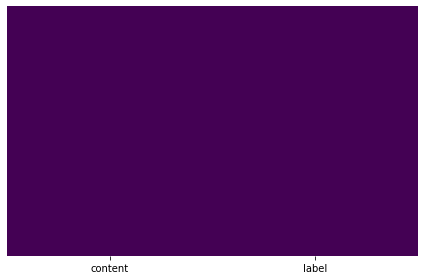

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [126]:
#loading the data
x=df.iloc[:,:-1].values
x

array([[' Get fucking real dude.'],
       [" She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."],
       [" why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."],
       ...,
       ['  hahahahaha >:) im evil mwahahahahahahahahaha'],
       [' What&;s something unique about Ohio? :)'],
       [' Who is the biggest gossiper you know?']], dtype=object)

In [127]:
y=df.iloc[:,-1:].values
y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [128]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [129]:
x_train.shape

(16000, 1)

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())


In [131]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [132]:
y_test=y_test.flatten()
y_test

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [133]:
y_pred=model.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['1' '1']
 ['0' '0']
 ...
 ['0' '0']
 ['0' '0']
 ['0' '0']]


In [134]:
print('predicted training data',model.score(training_data,y_train))
print('predicted testing data',model.score(testing_data,y_test))

predicted training data 0.877375
predicted testing data 0.7990502374406399


In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[2044  385]
 [ 419 1153]]
Accuracy= 79.90502374406398


In [136]:
TN=2044
FN=385
FP=419
TP=1153
accuracy_naive=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_naive*100)

79.90502374406398


In [137]:
bully = df[df.label==1]
nonbully = df[df.label==0]

#DECISION TREE CLASSIFIER

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())


In [139]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(training_data,y_train)

DecisionTreeClassifier()

In [140]:
y_test=y_test.flatten()
y_test

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [141]:
y_pred=tree.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['1' '1']
 ['0' '0']
 ...
 ['0' '0']
 ['0' '0']
 ['0' '0']]


In [142]:
print('predicted training data',tree.score(training_data,y_train))
print('predicted testing data',tree.score(testing_data,y_test))

predicted training data 0.9956875
predicted testing data 0.8577855536115971


In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[1941  488]
 [  81 1491]]
Accuracy= 85.77855536115972


In [144]:
TN=1935
FN=494
FP=77
TP=1495
accuracy_decision=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_decision*100)

85.72856785803549




#LOGISTIC REGRESSION



In [145]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [147]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(training_data,y_train)
print(model2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [148]:
y_test=y_test.flatten()
y_test

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [149]:
y_pred=model2.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['1' '1']
 ['0' '0']
 ...
 ['0' '0']
 ['0' '0']
 ['0' '0']]


In [150]:
print('predicted training data',model2.score(training_data,y_train))
print('predicted testing data',model2.score(testing_data,y_test))

predicted training data 0.9319375
predicted testing data 0.8397900524868783


In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[2037  392]
 [ 249 1323]]
Accuracy= 83.97900524868783


In [152]:
TN=2037 
FN=392
FP=249
TP=1323
accuracy_logistic=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_logistic*100)

83.97900524868783


#RANDOM FOREST CLASSIFIER

In [153]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [155]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [156]:
y_test=y_test.flatten()
y_test

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [157]:
y_pred=forest.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['1' '1']
 ['0' '0']
 ...
 ['0' '0']
 ['0' '0']
 ['0' '0']]


In [158]:
print('predicted training data',forest.score(training_data,y_train))
print('predicted testing data',forest.score(testing_data,y_test))

predicted training data 0.9956875
predicted testing data 0.928767808047988


In [159]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[2228  201]
 [  84 1488]]
Accuracy= 92.8767808047988


In [160]:
TN=2227
FN=202
FP=84
TP=1488
accuracy_random=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_random*100)

92.85178705323669


#KNeighbors Classifier

In [161]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [163]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [164]:
y_test=y_test.flatten()
y_test

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [165]:
y_pred=model1.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['0' '1']
 ['0' '0']
 ...
 ['0' '0']
 ['0' '0']
 ['0' '0']]


In [166]:
print('predicted training data',model1.score(training_data,y_train))
print('predicted testing data',model1.score(testing_data,y_test))

predicted training data 0.8196875
predicted testing data 0.7120719820044988


In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[1738  691]
 [ 461 1111]]
Accuracy= 71.20719820044988


In [168]:
TN=1738
FN=691
FP=461
TP=1111
accuracy_knn=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_knn*100)

71.20719820044988


#SVM


In [169]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [171]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [172]:
print('predicted training data',model3.score(training_data,y_train))
print('predicted testing data',model3.score(testing_data,y_test))

predicted training data 0.95975
predicted testing data 0.8872781804548863


In [173]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[1738  691]
 [ 461 1111]]
Accuracy= 71.20719820044988


In [174]:
TN=1738
FN=691
FP=461
TP=1111
accuracy_svm=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_svm*100)

71.20719820044988


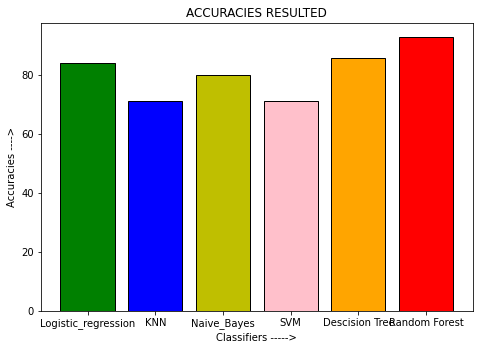

In [177]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['Logistic_regression','KNN','Naive_Bayes','SVM','Descision Tree','Random Forest']

accuracy = [accuracy_logistic*100,accuracy_knn*100,accuracy_naive*100,accuracy_svm*100,accuracy_decision*100,accuracy_random*100]

ax.bar(algo[0],accuracy[0],color = 'g')

ax.bar(algo[1],accuracy[1],color = 'b')

ax.bar(algo[2],accuracy[2],color = 'y')

ax.bar(algo[3],accuracy[3],color = 'pink')

ax.bar(algo[4],accuracy[4],color = 'orange')

ax.bar(algo[5],accuracy[5],color = 'r')



plt.xlabel('Classifiers ----->')

plt.ylabel('Accuracies ---->')

plt.title('ACCURACIES RESULTED')

plt.show()